In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from causalai.models.tabular.pc import PCSingle, PC
from causalai.models.common.CI_tests.partial_correlation import PartialCorrelation

from causalai.data.tabular import TabularData

In [3]:
df = pd.read_csv('data/train.csv')

# drop non-numerical columns
df = df.select_dtypes(include=[np.number])
df.drop(columns=['PassengerId'], inplace=True)

df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [4]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
data_obj = TabularData(df.values, var_names= list(df.columns))

In [7]:

pvalue_thres = 0.01
CI_test = PartialCorrelation()
pc = PC(
        data=data_obj,
        prior_knowledge=None,
        CI_test=CI_test,
        use_multiprocessing=False
        )

In [8]:
result = pc.run(pvalue_thres=pvalue_thres, max_condition_set_size=3)

print(f'The output result has keys: {result.keys()}')


print('\nCausal relationships:')
graph_est={n:[] for n in result.keys()}
for key in result.keys():
    parents = result[key]['parents']
    graph_est[key].extend(parents)
    print(f'{key}: {parents}')
print()

The output result has keys: dict_keys(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

Causal relationships:
Survived: ['Pclass', 'Fare']
Pclass: ['Survived', 'Age']
Age: ['Pclass']
SibSp: ['Fare', 'Parch']
Parch: ['Fare', 'SibSp']
Fare: ['Survived', 'Parch', 'SibSp']



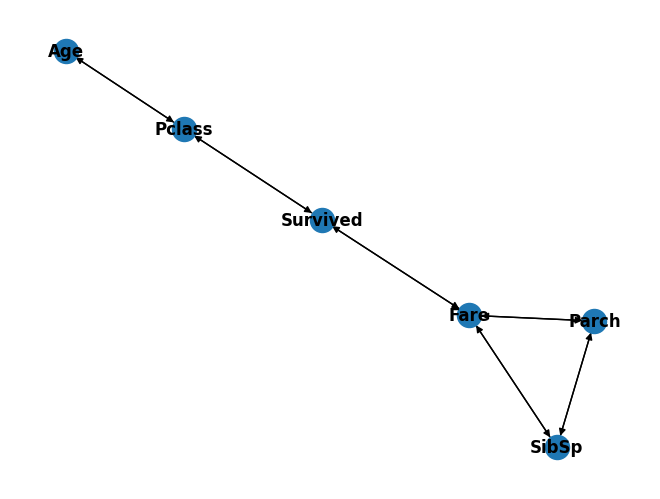

In [9]:
import networkx as nx

G = nx.DiGraph(graph_est)
nx.draw(G, with_labels=True, font_weight='bold')